# Identifying the Problem

Clearly define the specific question or problem related to the impact of mobile phones on students' health.

# Data Understanding

# Data Collection
First, load the data from your CSV file.

In [2]:
# Step 2: Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset from your Google Colab environment
file_path = '/content/Impact_of_Mobile_Phone_on_Students_Health.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Dataset Overview:")
print(df.info())  # Shows data types and missing values
print(df.describe())  # Summary statistics
print(df.head())  # Display the first few rows\

Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           100 non-null    object
 1   Age                             100 non-null    object
 2   Gender                          100 non-null    object
 3   Mobile Phone                    100 non-null    object
 4   Mobile Operating System         100 non-null    object
 5   Mobile phone use for education  98 non-null     object
 6   Mobile phone activities         99 non-null     object
 7   Helpful for studying            98 non-null     object
 8   Educational Apps                98 non-null     object
 9   Daily usages                    99 non-null     object
 10  Performance impact              98 non-null     object
 11  Usage distraction               98 non-null     object
 12  Attention span           

# Data Exploration
Explore the structure and types of data in the dataset.

Dataset Shape: (100, 20)
Data Types:
 Names                             object
Age                               object
Gender                            object
Mobile Phone                      object
Mobile Operating System           object
Mobile phone use for education    object
Mobile phone activities           object
Helpful for studying              object
Educational Apps                  object
Daily usages                      object
Performance impact                object
Usage distraction                 object
Attention span                    object
Useful features                   object
Health Risks                      object
Beneficial subject                object
Usage symptoms                    object
Symptom frequency                 object
Health precautions                object
Health rating                     object
dtype: object

Basic Statistics Summary:
       Names    Age Gender  Mobile Phone  Mobile Operating System   \
count    100    100     100    

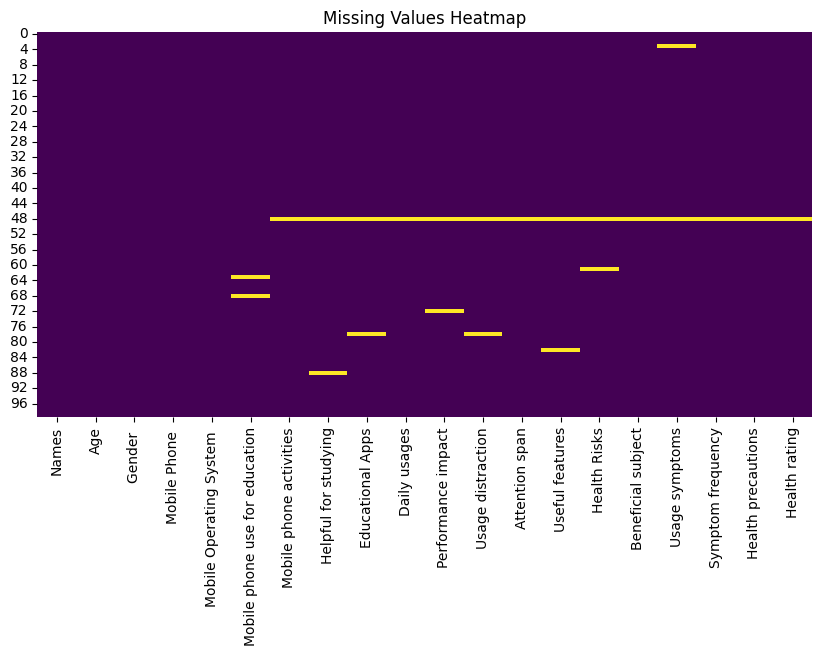

In [3]:
# Check the shape and types of data
print("Dataset Shape:", df.shape)
print("Data Types:\n", df.dtypes)

# Get basic summarization statistics
print("\nBasic Statistics Summary:")
print(df.describe(include='all'))

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Data Preprocessing

Cleaning
Remove inconsistencies or errors, handle missing values, and remove duplicates.

In [4]:
# Step 3: Data Cleaning

# Impute missing values (using the most frequent strategy)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check for duplicate records
duplicates = df_imputed.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")

# Remove duplicates
df_imputed = df_imputed.drop_duplicates()



Number of duplicate records: 0


Transforming Categorical Variables
Convert categorical variables to numerical representations.

In [5]:
# Step 4: Convert Categorical to Numerical
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])
    label_encoders[column] = le

print("Categorical columns converted to numerical.")


Categorical columns converted to numerical.


Handle missing values (mean, median, mode).

Reduction
Dimensionality reduction or attribute subset selection can be implemented using techniques like PCA.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Use df_imputed instead of df to ensure 'Health rating' is numerical
health_rating_data = df_imputed[['Health rating']]

# Scale the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(health_rating_data)

pca = PCA(n_components=1)
reduced_df = pca.fit_transform(scaled_data) # Use scaled data here

In [7]:
# Convert string columns to numerical representations
# First you need to identify columns with string values
for col in df_imputed.columns:
  if df_imputed[col].dtype == 'object':
    print(f"Column {col} contains string values.")

Normalizing Numerical Data
Normalize numerical columns to ensure uniformity.

In [8]:
# Step 5: Normalize Numerical Columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df_imputed.select_dtypes(include=[np.number]).columns
df_imputed[numerical_columns] = scaler.fit_transform(df_imputed[numerical_columns])

# Display the normalized dataset
print("\nNormalized Data (first few rows):")
print(df_imputed.head())


Normalized Data (first few rows):
      Names       Age   Gender   Mobile Phone   Mobile Operating System   \
0 -1.437674 -0.045798  0.484322            0.0                 -0.484322   
1 -0.987318 -0.045798  0.484322            0.0                 -0.484322   
2 -0.606248 -0.045798  0.484322            0.0                  2.064742   
3 -1.645531 -0.045798  0.484322            0.0                 -0.484322   
4  1.506960 -0.045798  0.484322            0.0                  2.064742   

   Mobile phone use for education  Mobile phone activities  \
0                        0.818044                 0.428623   
1                        0.818044                 0.428623   
2                        0.818044                -0.670411   
3                       -1.519224                -0.670411   
4                       -1.519224                -0.670411   

   Helpful for studying  Educational Apps  Daily usages  Performance impact  \
0              0.204124         -0.770154     -0.268328 

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the 'Health rating' column and transform it
df['Health rating'] = encoder.fit_transform(df['Health rating'])

# Now you can apply MinMaxScaler
scaler = MinMaxScaler()
df[['Health rating']] = scaler.fit_transform(df[['Health rating']])

Handling Missing Data

Handle missing values (median, mean, and mode).

In [10]:
# Handle missing values (e.g., filling with median, mean, or mode)
df = df.fillna(df.median(numeric_only=True))

In [11]:
# Drop duplicate records
df = df.drop_duplicates()

In [12]:
# Assuming that 'df' is the DataFrame you intended to copy
Original_data = df.copy()

In [13]:
# Check the column names of the DataFrame
print(df.columns)
df.info()

Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Names                           100 non-null    object 
 1   Age                             100 non-null    object 
 2   Gender                          100 non-null    object 
 3   Mobile Phone                    100 non-null    object 
 4   Mobile Operating System         100 non-null    object 
 5   Mob

Data Mining

Clustering
Implement clustering techniques to group similar data points.

In [14]:
# Step 6: Apply Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_imputed['Cluster'] = kmeans.fit_predict(df_imputed[numerical_columns])

print("Clustering completed. Cluster labels added to the DataFrame.")

Clustering completed. Cluster labels added to the DataFrame.


Evaluate Clustering Performance
Evaluate the performance of the clustering method.

In [15]:
# Step 7: Evaluate Clustering Performance
from sklearn.metrics import silhouette_score

print("\nCluster Centers:")
print(kmeans.cluster_centers_)

score = silhouette_score(df_imputed[numerical_columns], df_imputed['Cluster'])
print(f"\nSilhouette Score: {score}")


Cluster Centers:
[[ 1.10856795  0.20863316  0.4843221   0.         -0.4843221  -0.74013492
   1.61924317 -0.64639313  0.68847104 -0.71554175  0.30536346 -0.87646189
  -0.09549792 -2.37589003  0.55507809 -0.62921153 -0.698804   -0.50639268
   0.19890509 -0.82570583]
 [ 0.07731247 -0.04579752 -0.13740075  0.         -0.4843221  -0.28408259
  -0.13429657  0.20412415 -0.21516499 -0.24651286 -0.36611947 -0.44891951
  -0.27466851  0.38780944  0.48891254  0.29909816 -0.04104963  0.30364312
  -0.27568287  0.22624426]
 [-0.18530602  0.01180942  0.05146223  0.          0.42949319  0.30355086
  -0.07942075 -0.08473078  0.08850827  0.27170335  0.24865505  0.44649946
   0.2232905  -0.03103485 -0.44105439 -0.16014633  0.11086526 -0.17756626
   0.19074655 -0.08154301]]

Silhouette Score: 0.057222368940916105


Model Training and Evaluation

Splitting Data
Split the dataset into training and testing sets.

In [16]:
df_imputed.columns

Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating', 'Cluster'],
      dtype='object')

In [17]:
# Step 8: Prepare data for model training
from sklearn.model_selection import train_test_split

# Identify target variable
y_col = 'Daily usages'
X = df_imputed.drop(columns=[y_col])
y = df_imputed[y_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")

Data split into training and testing sets.


Evaluate resulting model/patterns.

In [18]:
# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  # Use Linear Regression for continuous target

model = LinearRegression()  # Create a Linear Regression model instance

# Cross-validation to evaluate model reliability
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Use appropriate scoring for regression

print(f"Cross-validation scores (negative MSE): {cv_scores}")
print(f"Mean CV score (negative MSE): {cv_scores.mean()}")

# Hyperparameter tuning (GridSearchCV example)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],  # Example hyperparameters for Linear Regression
    'positive': [True, False]
}

# Use your Linear Regression model object in GridSearchCV
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score (negative MSE): {grid_search.best_score_}")

Cross-validation scores (negative MSE): [-1.06095172 -0.74356915 -0.77078832 -1.46231276 -1.17464625]
Mean CV score (negative MSE): -1.0424536417215962
Best parameters: {'fit_intercept': True, 'positive': True}
Best CV score (negative MSE): -1.0609207895161321


Clustering

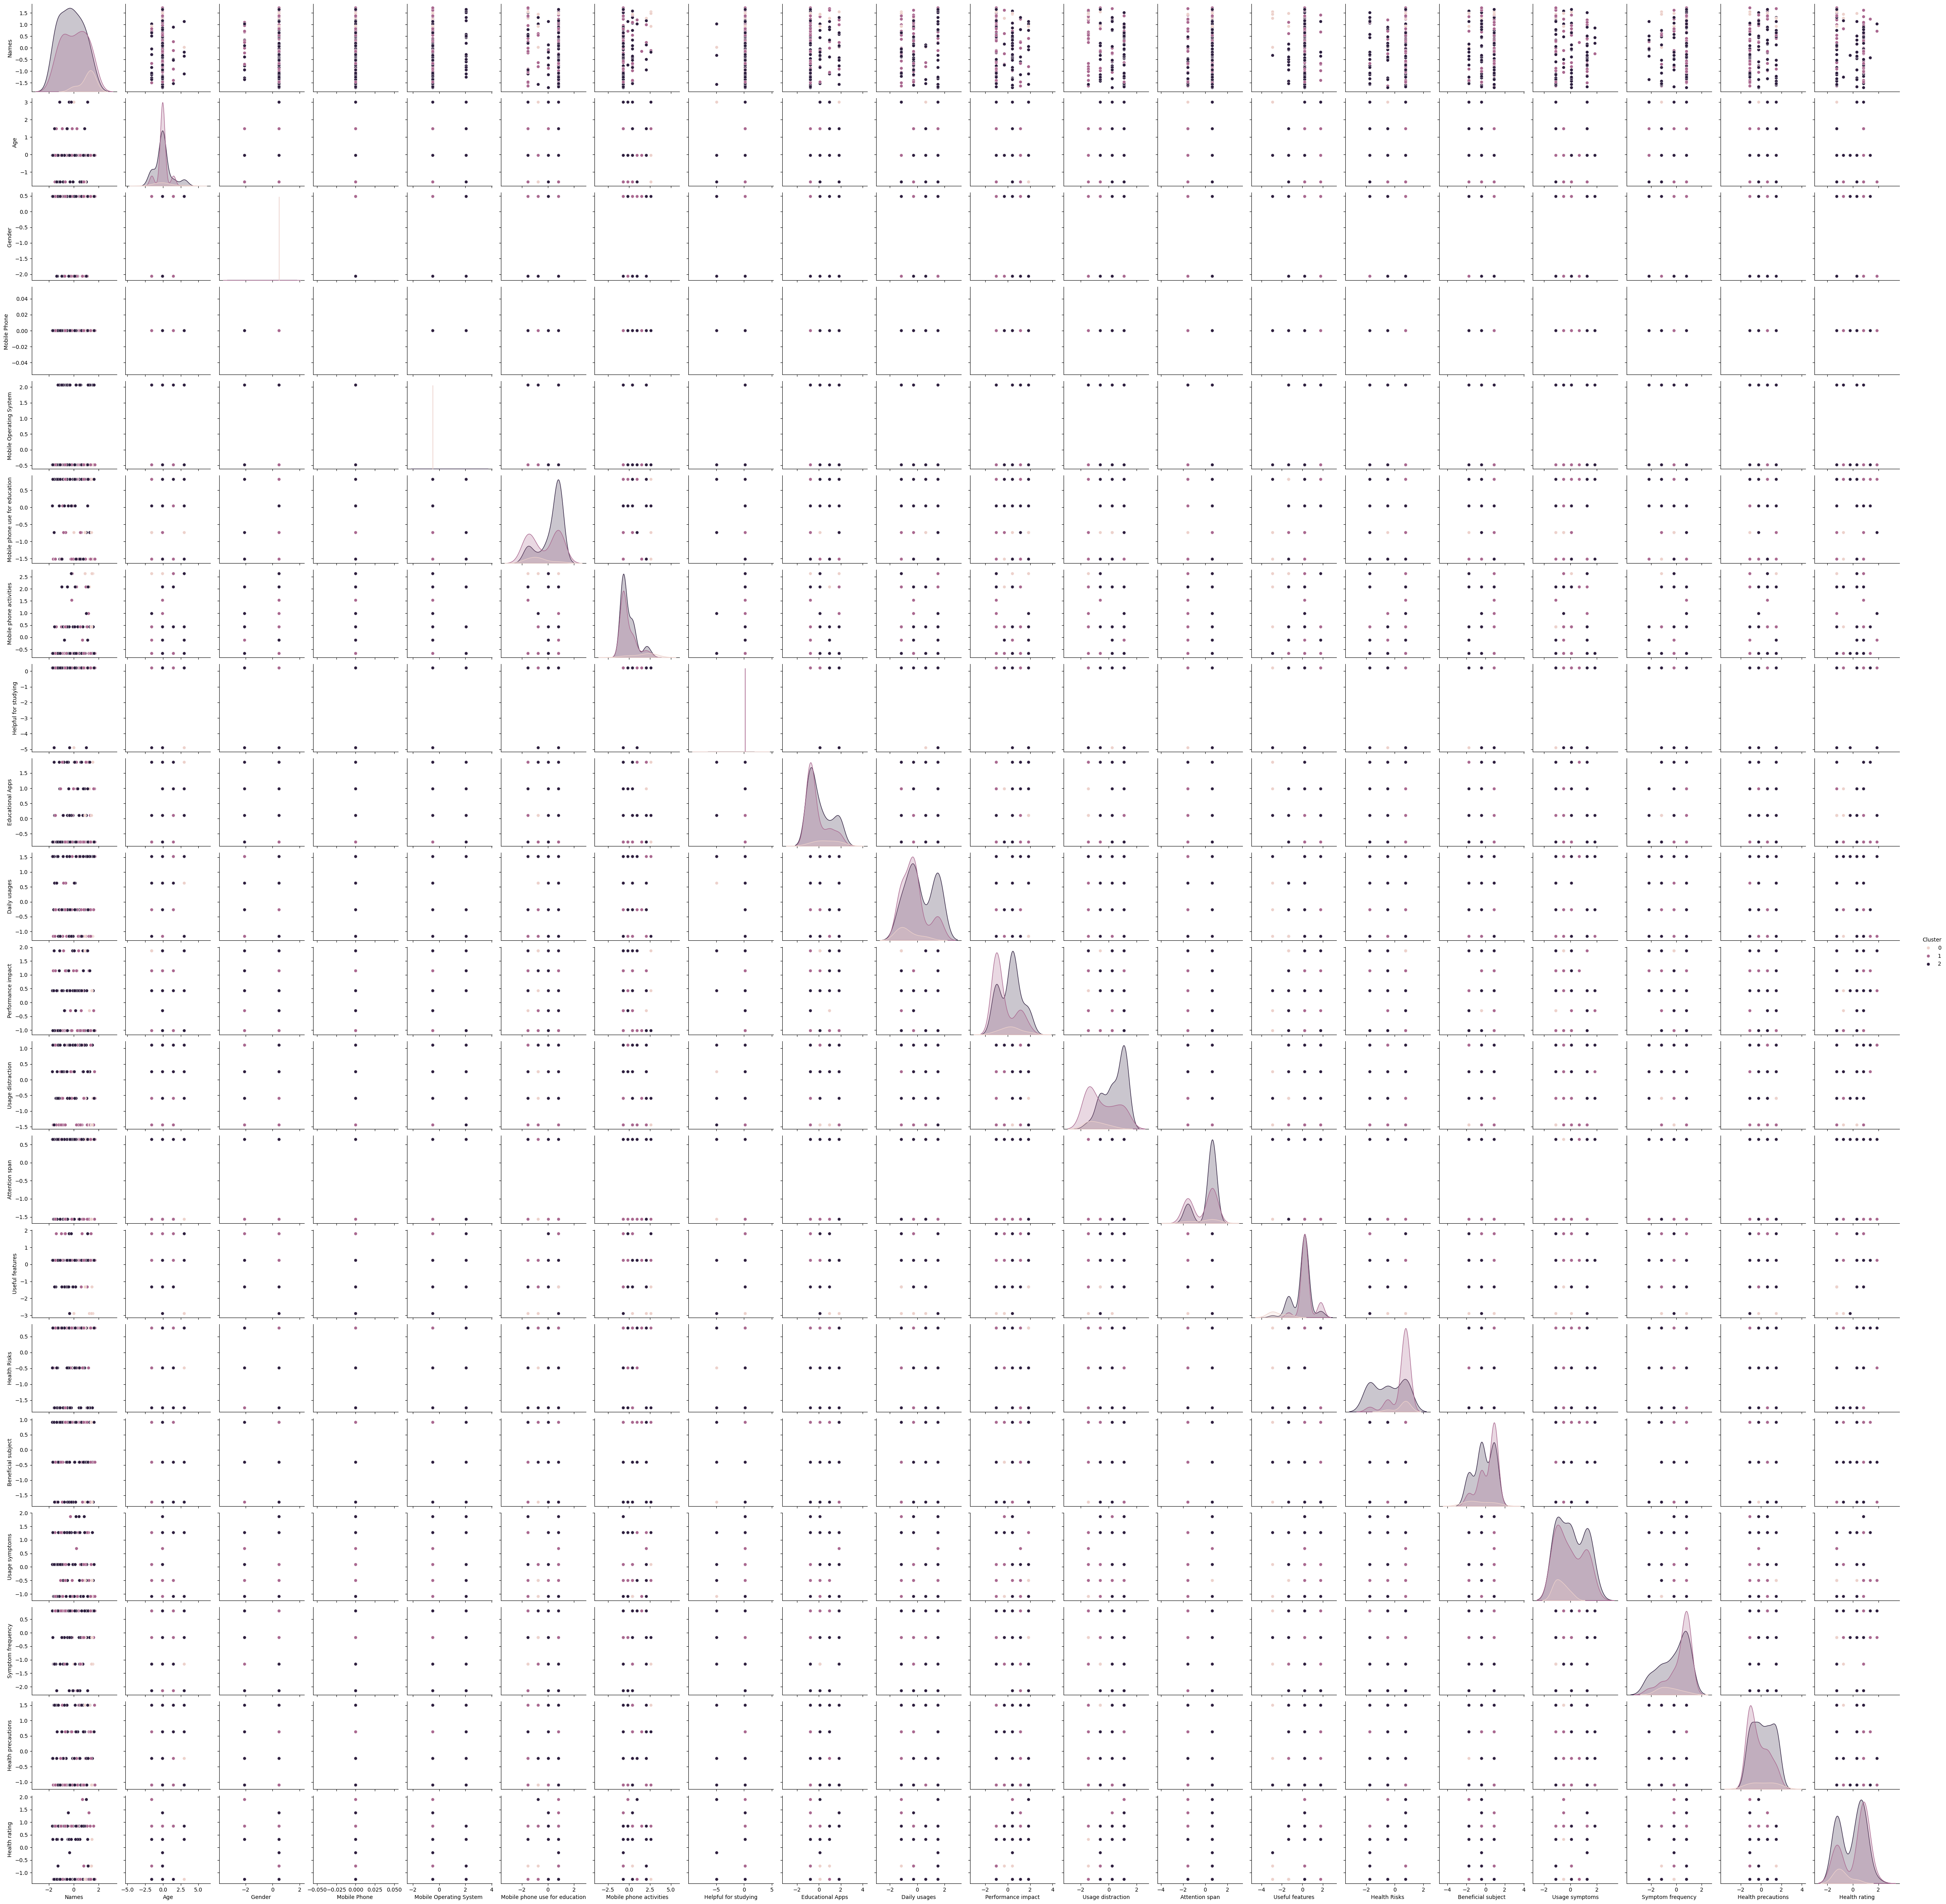

In [19]:
# Visualize Clustering Results
sns.pairplot(df_imputed, hue='Cluster')
plt.show()

Linear Regression

In [20]:
# Step 9: Train a Random Forest Regressor (instead of Classifier)
from sklearn.ensemble import RandomForestRegressor # Import Regressor instead of Classifier

model = RandomForestRegressor(random_state=42) # Change model to Regressor
model.fit(X_train, y_train)

# Evaluate the model
# For regression, use a metric like R-squared instead of accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print(f'Model R-squared: {r2}')

Model R-squared: -0.007427495291901787


 Visualization of Results

Feature Importance
Visualize the importance of each feature in the model.

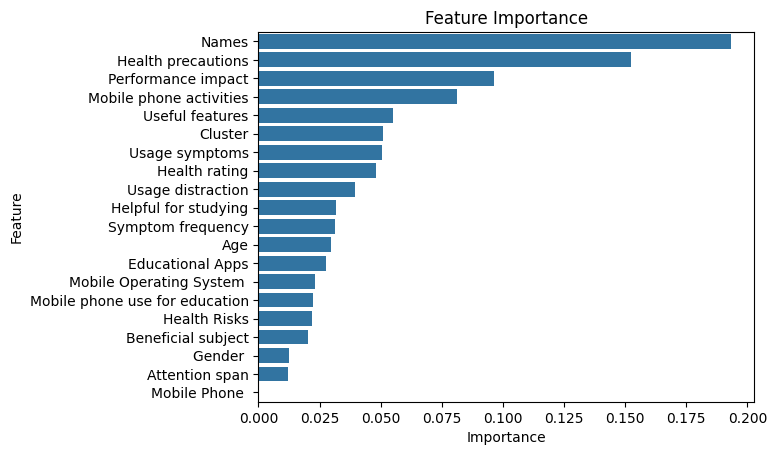

In [21]:
# Step 10: Visualize Feature Importance
importances = model.feature_importances_
feature_names = X.columns # Use X.columns instead of df_imputed.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dtype='object')


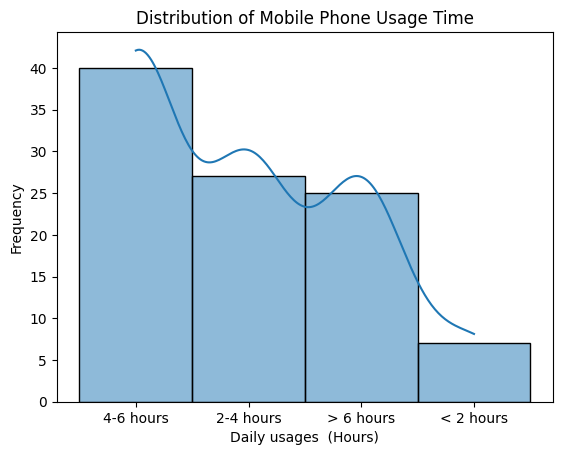

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)
column_name = 'Daily usages'

sns.histplot(df[column_name], bins=30, kde=True)
plt.title('Distribution of Mobile Phone Usage Time')
plt.xlabel('Daily usages  (Hours)')
plt.ylabel('Frequency')
plt.show()

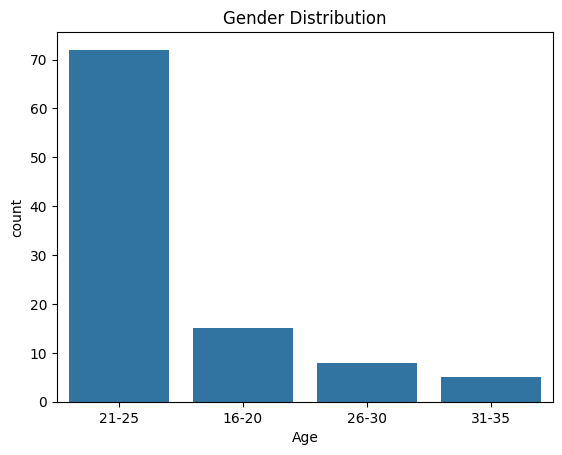

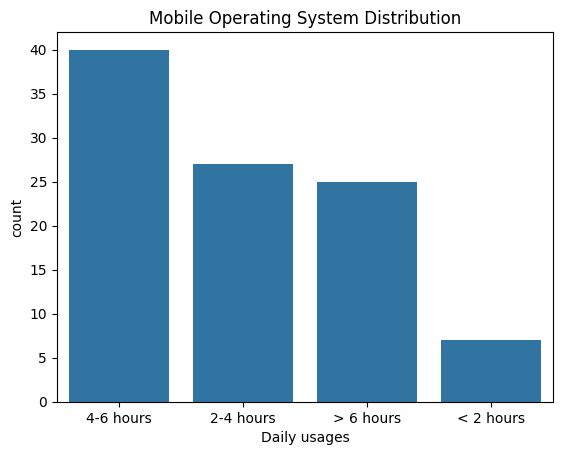

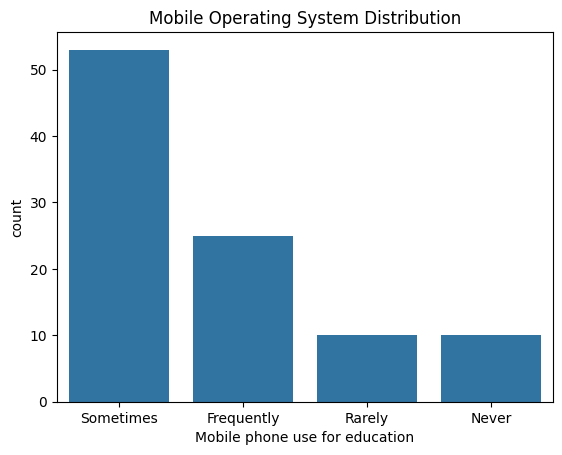

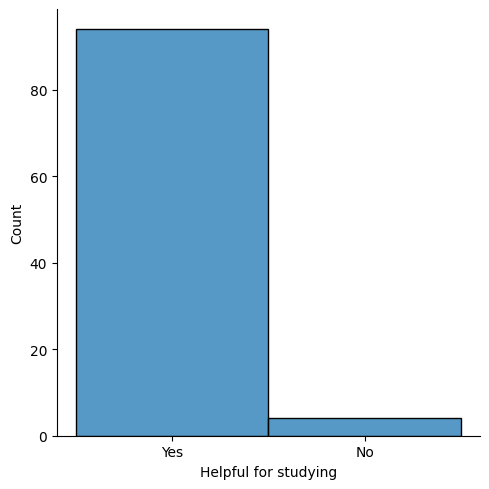

In [23]:
# Visualize the distribution of key variables
sns.countplot(x='Age', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Daily usages', data=df)
plt.title('Mobile Operating System Distribution')
plt.show()

sns.countplot(x='Mobile phone use for education', data=df)
plt.title('Mobile Operating System Distribution')
plt.show()

imputedData = df  # Rename df to imputedData
sns.displot(imputedData["Helpful for studying"])

Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dtype='object')


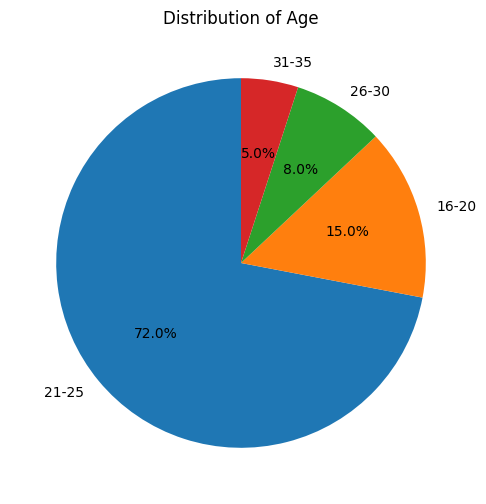

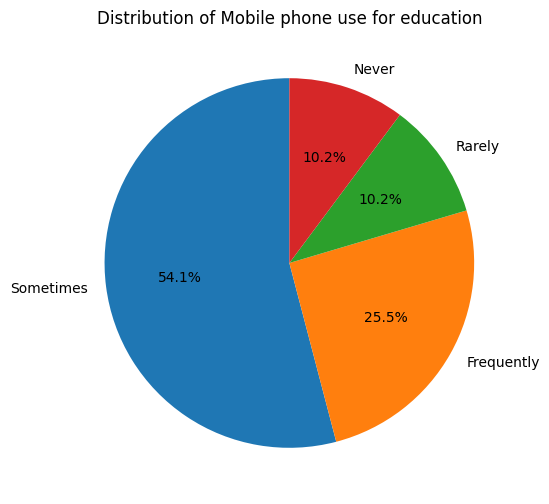

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into the imputedData variable
imputedData = pd.read_csv('/content/Impact_of_Mobile_Phone_on_Students_Health.csv')

# Print the actual column names to inspect them
print(imputedData.columns)

# Access columns using their actual names (replace with actual names from the output above)
plt.figure(figsize=(6, 6))
plt.pie(imputedData['Age'].value_counts(),  # Replace 'Age' with the actual column name
        labels=imputedData['Age'].value_counts().index,  # Replace 'Age' with the actual column name
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Age')  # Update the title accordingly
plt.show()


import matplotlib.pyplot as plt
import pandas as pd

# Repeat for other categorical columns as needed
# For example:
plt.figure(figsize=(6, 6))

# Access the column using its actual name from the DataFrame
plt.pie(imputedData['Mobile phone use for education'].value_counts(),
        labels=imputedData['Mobile phone use for education'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)

# Update the title to reflect the actual column name
plt.title('Distribution of Mobile phone use for education')
plt.show()

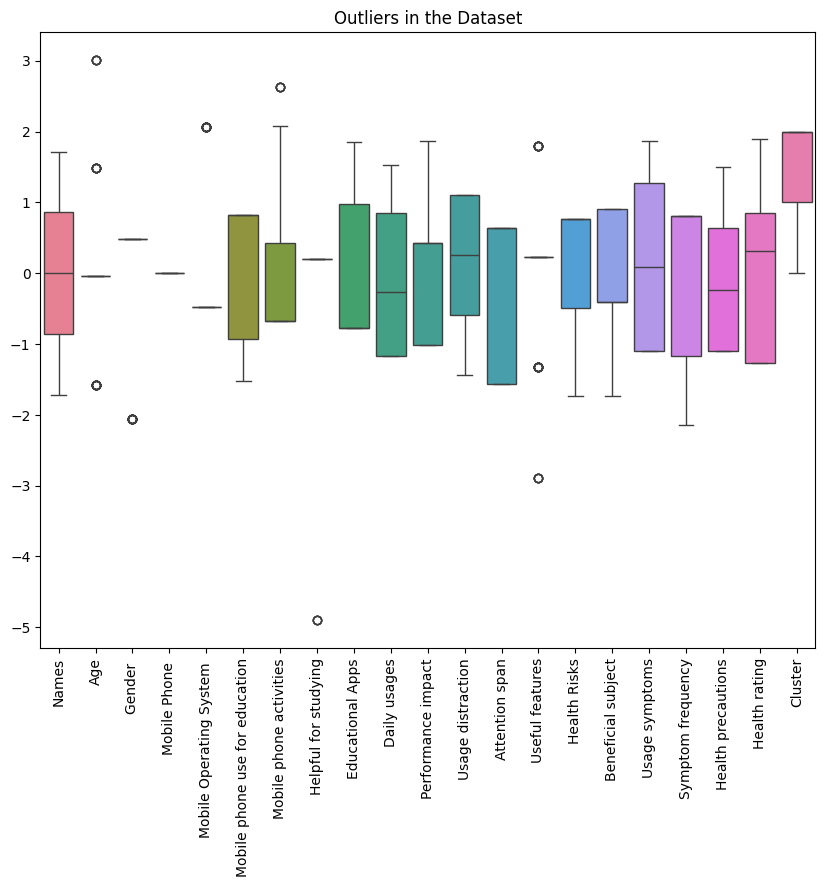

In [25]:

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_imputed)
plt.xticks(rotation=90)
plt.title("Outliers in the Dataset")
plt.show()

Save the Cleaned Data Save the cleaned dataset for future reference.

In [26]:
# Step 11: Save the cleaned dataset
df_imputed.to_csv('Cleaned_Impact_of_Mobile_Phone_on_Students_Health.csv', index=False)
print("Cleaned data saved to 'Cleaned_Impact_of_Mobile_Phone_on_Students_Health.csv'.")

Cleaned data saved to 'Cleaned_Impact_of_Mobile_Phone_on_Students_Health.csv'.
